<a href="https://colab.research.google.com/github/kirdol/RA_Praticals/blob/main/Practical_1_Alexandra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and drive authentication

In [1]:
# Installer les packages nécessaires
if (!require(tseries)) {
  install.packages("tseries")
  library(tseries)
}
if (!require(googledrive)) {
  install.packages("googledrive")
  library(googledrive)
}

# Autoriser l'accès à Google Drive
drive_auth()

Loading required package: tseries

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘tseries’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: googledrive

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=bd5c52f6b1beea4c1be0af60902deb06&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVZHN2ZpUlJic2lLZVNFX1AxM3Z4TUpEa01HQUFrU2NScVVITnZRTjhmRVJnOVBIXzFHMTJiMlFIeVFyZkZtelhLMVVIUSIsInN0YXRlIjoiYmQ1YzUyZjZiMWJlZWE0YzFiZTBhZjYwOTAyZGViMDYifQ==


In [2]:
# Rechercher le fichier sur Google Drive
# Cela ouvrira un lien d'authentification. Ensuite, tu pourras voir une liste de fichiers dans ton Drive.
file <- drive_get("Crypto_data.csv")

# Télécharger le fichier sur le système temporaire de Colab
drive_download(file, path = "Crypto_data.csv")

# Lire les données depuis le fichier CSV
bitcoin_data <- read.csv("Crypto_data.csv")

# Afficher un aperçu des données
head(bitcoin_data)

✔ The input `path` resolved to exactly 1 file.

File downloaded:

• Crypto_data.csv <id: 1vgkfuVt-8fmwEmVjZ9pNF7BiMTTiFvtr>

Saved locally as:

• Crypto_data.csv



,Bitcoin,Ethereum
,<dbl>,<dbl>
1,47313.35,3401.124
2,47243.93,3394.598
3,47197.27,3388.820
4,47207.95,3386.160
5,47206.35,3381.049
6,47224.81,3342.820


# Part 1: Financial returns and normality

In mathematical finance, many forecasting and inference methods critically rely on a setting under which the financial returns are independent and the logarithm of the returns are Normally distributed. In this exercise, we would like to check whether these assumptions are satisfied using the Bitcoin dataset.

### a) Read in the Bitcoin data from file Crypto data.csv. Then, assess the stationarity of the (raw) Bitcoin prices.

Stationarity in a time series means that its statistical properties—like mean, variance, and autocovariance—are constant over time.

There are two main types:

Weak stationarity: The series has a constant mean, constant variance, and autocovariance depends only on the time lag, not time itself.

Strict stationarity: The entire probability distribution remains the same over time.
Stationarity is crucial for many time series models, as they assume data to be stationary for accurate predictions and analysis. Non-stationary data can lead to unreliable results.


	Augmented Dickey-Fuller Test

data:  bitcoin_prices
Dickey-Fuller = -2.4484, Lag order = 11, p-value = 0.3885
alternative hypothesis: stationary



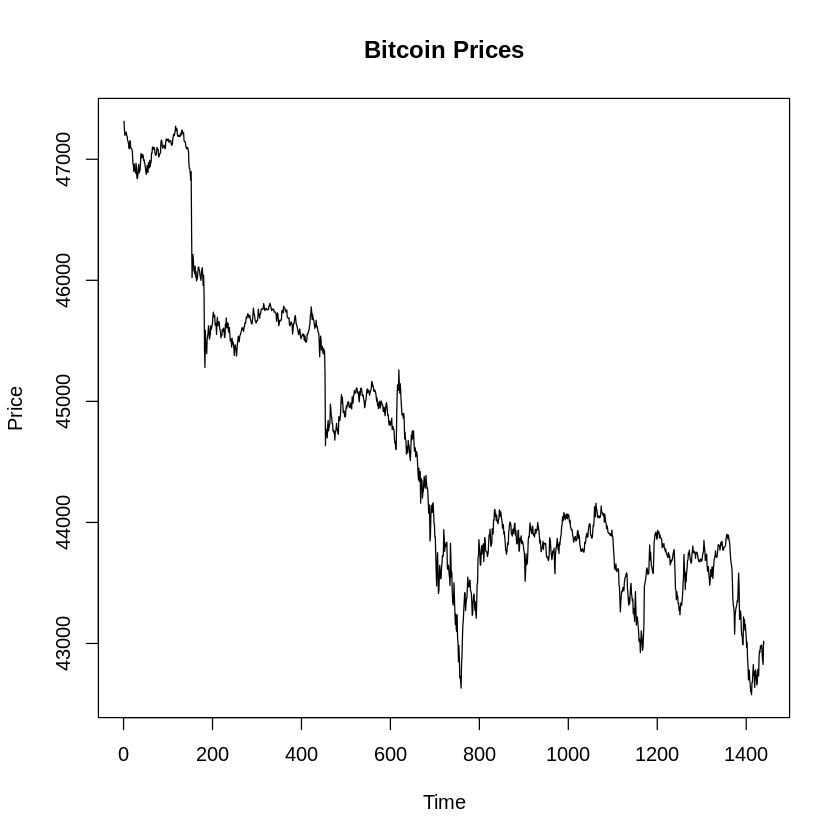

In [3]:
# Extraire la colonne des prix Bitcoin
bitcoin_prices <- bitcoin_data$Bitcoin

# Tracer les prix bruts de Bitcoin
plot(bitcoin_prices, type = "l", main = "Bitcoin Prices", ylab = "Price", xlab = "Time")

# Effectuer le test de Dickey-Fuller pour vérifier la stationnarité
adf_test <- adf.test(bitcoin_prices)

# Afficher le résultat du test ADF
print(adf_test)

### b) Create a function to transform the Bitcoin prices into their negative log returns counterparts. Plot the latter series and assess their stationarity. To compare the series, also plot the negative log returns on a common scale.

Warning message in adf.test(bitcoin_negative_log_returns):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  bitcoin_negative_log_returns
Dickey-Fuller = -11.035, Lag order = 11, p-value = 0.01
alternative hypothesis: stationary



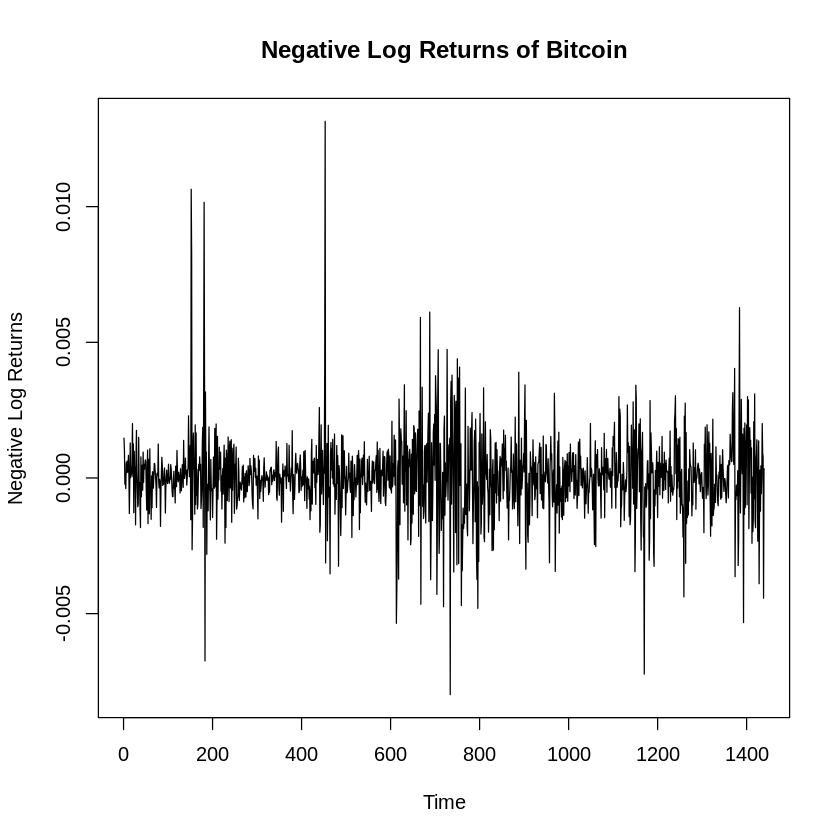

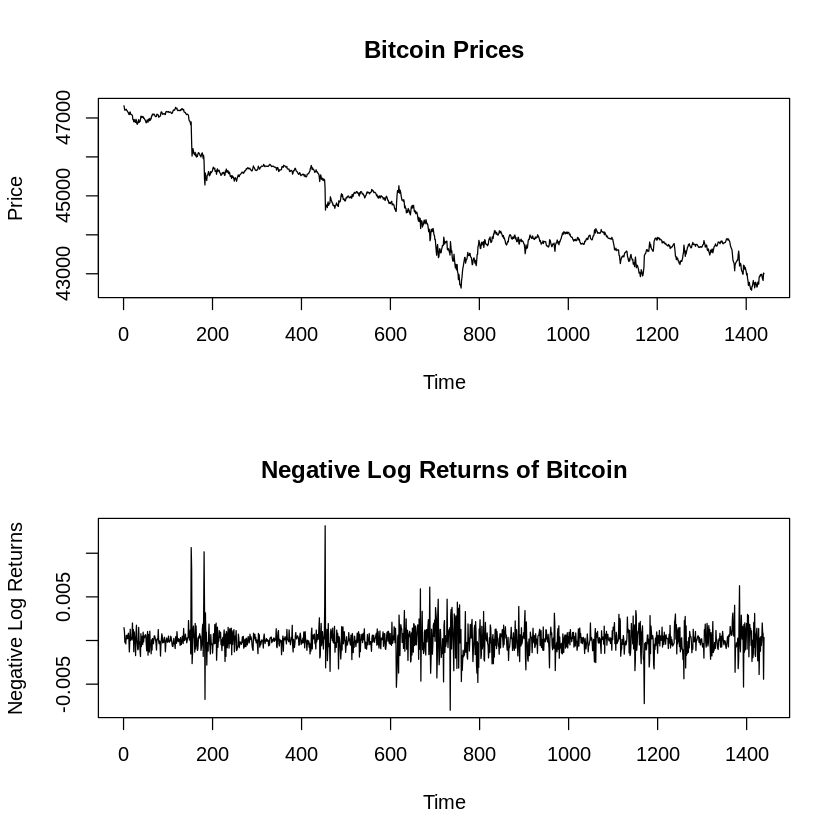

In [4]:
# b) Fonction pour calculer les rendements logarithmiques négatifs
negative_log_returns <- function(prices) {
  log_returns <- diff(log(prices))
  return(-log_returns)
}

# Appliquer la fonction aux prix du Bitcoin
bitcoin_negative_log_returns <- negative_log_returns(bitcoin_prices)

# Tracer la série des rendements logarithmiques négatifs
plot(bitcoin_negative_log_returns, type = "l", main = "Negative Log Returns of Bitcoin", ylab = "Negative Log Returns", xlab = "Time")

# Effectuer le test de Dickey-Fuller pour vérifier la stationnarité des rendements
adf_test_returns <- adf.test(bitcoin_negative_log_returns)

# Afficher le résultat du test ADF pour les rendements logarithmiques négatifs
print(adf_test_returns)

# Comparer les séries en les traçant sur une échelle commune
par(mfrow = c(2, 1))  # Pour tracer deux graphiques l'un sous l'autre
plot(bitcoin_prices, type = "l", main = "Bitcoin Prices", ylab = "Price", xlab = "Time")
plot(bitcoin_negative_log_returns, type = "l", main = "Negative Log Returns of Bitcoin", ylab = "Negative Log Returns", xlab = "Time")

# Remettre le graphique à une seule trame
par(mfrow = c(1, 1))

### c)


In [5]:
# Installer les packages nécessaires
if (!require(nortest)) {
  install.packages("nortest")
  library(nortest)
}

Loading required package: nortest

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘nortest’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



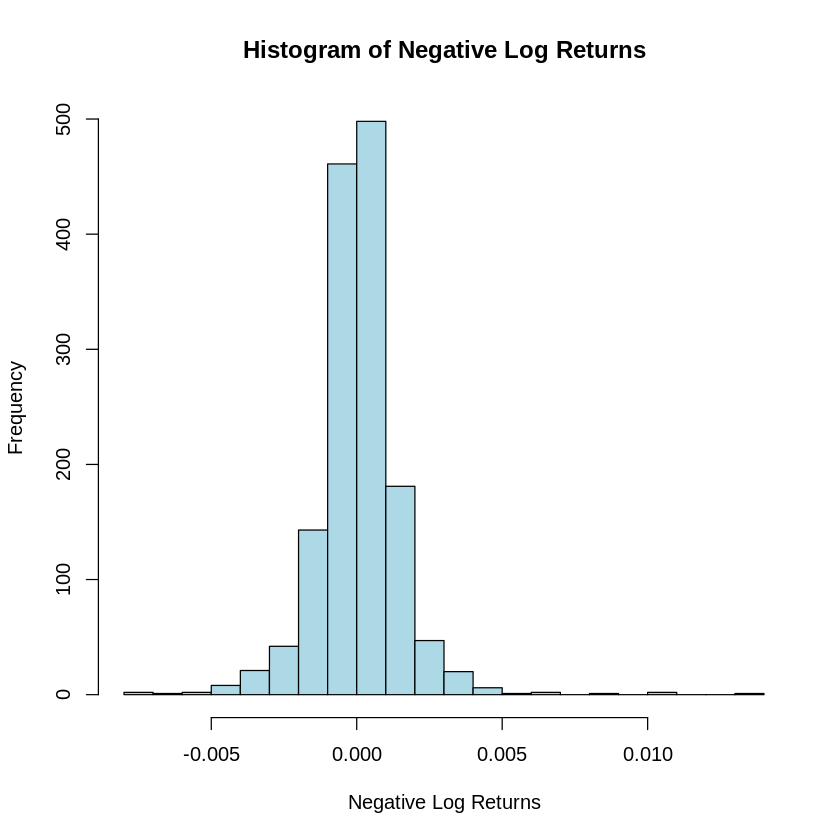


	Anderson-Darling normality test

data:  bitcoin_negative_log_returns
A = 26.277, p-value < 2.2e-16



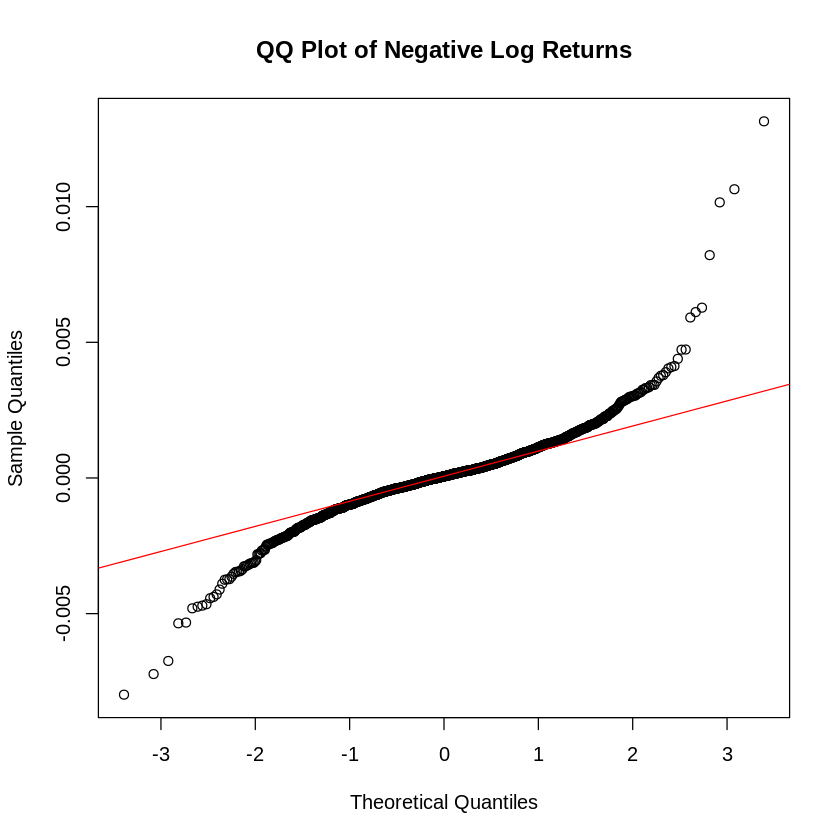

In [6]:
# Lire les données et calculer les rendements logarithmiques négatifs comme avant
bitcoin_data <- read.csv("Crypto_data.csv")
bitcoin_prices <- bitcoin_data$Bitcoin
bitcoin_negative_log_returns <- negative_log_returns(bitcoin_prices)

# 1. Histogramme des rendements logarithmiques négatifs
hist(bitcoin_negative_log_returns, breaks = 30, main = "Histogram of Negative Log Returns", xlab = "Negative Log Returns", col = "lightblue", border = "black")

# 2. QQ-plot pour comparer avec la distribution normale
qqnorm(bitcoin_negative_log_returns, main = "QQ Plot of Negative Log Returns")
qqline(bitcoin_negative_log_returns, col = "red")  # Ajouter une ligne de référence

# 3. Test d'Anderson-Darling pour la normalité
ad_test <- ad.test(bitcoin_negative_log_returns)

# Afficher le résultat du test d'Anderson-Darling
print(ad_test)

The Anderson-Darling test checks if data follow a specific distribution, such as the normal distribution. It compares the data's cumulative distribution with the expected distribution. If the test statistic is high and the p-value is low (usually less than 0.05), we reject the hypothesis that the data follow the specified distribution. The AD test is more sensitive to differences in the tails of the distribution compared to other normality tests.

The result of your Anderson-Darling test shows:

Test statistic (A): 26.277, which is quite large.
p-value: Less than 2.2e-16, which is extremely small.
Interpretation:
Since the p-value is far below the common threshold of 0.05, you reject the null hypothesis that the negative log returns of Bitcoin follow a normal distribution. This indicates that the log returns are not normally distributed.

This result aligns with the fact that financial data, like Bitcoin returns, often exhibit characteristics like fat tails (extreme values occurring more frequently than in a normal distribution), making them deviate from normality.

### d)

In [7]:
# Installer les packages nécessaires
if (!require(MASS)) {
  install.packages("MASS")
  library(MASS)
}

Loading required package: MASS



# Part 2 : Financial time series, heteroscedasticity and the random walk hypothesis

Another crucial hypothesis in asset pricing is the so-called homoscedasticity, i.e. constant variance of the residuals. We would also like to check this assumption.
We use the same Bitcoin data as in Part 1.

Homoscedasticity: Homoscedasticity refers to the assumption in regression models that the variance of the residuals (errors) is constant across all levels of the independent variable(s). In financial time series, this means the volatility of returns is stable over time.

### (a) Plot the ACF of the raw series as well as the negative log returns. Which one do you think are easier to model?

ACF (Autocorrelation Function): The ACF measures the correlation between a time series and its lagged values over different time intervals. It helps identify the persistence or patterns in the data, revealing whether past values influence future ones.

In [8]:
install.packages("forecast")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’




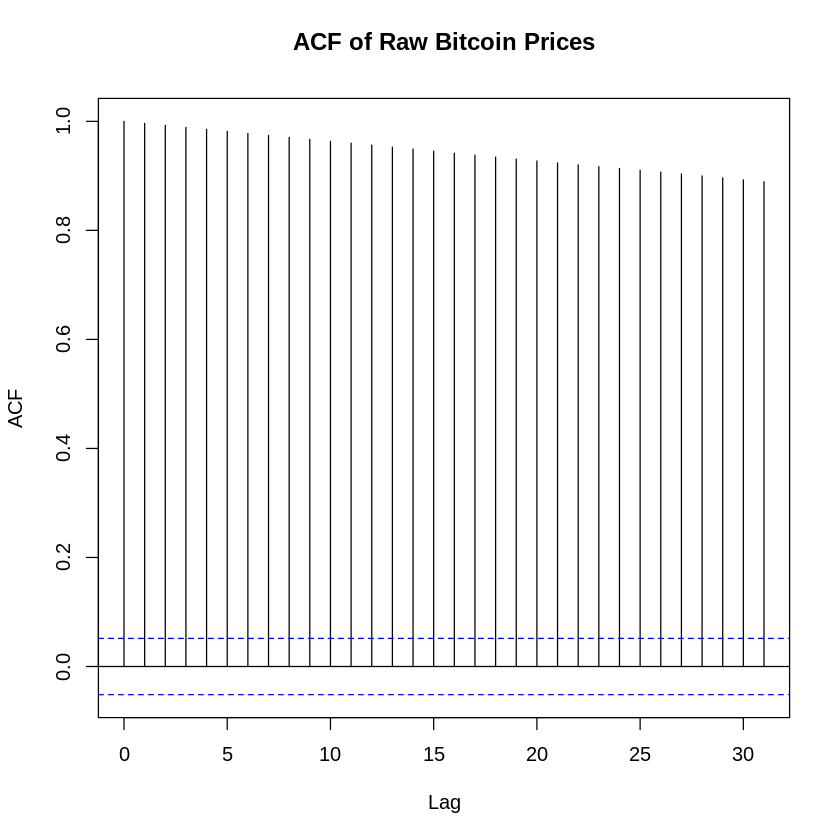

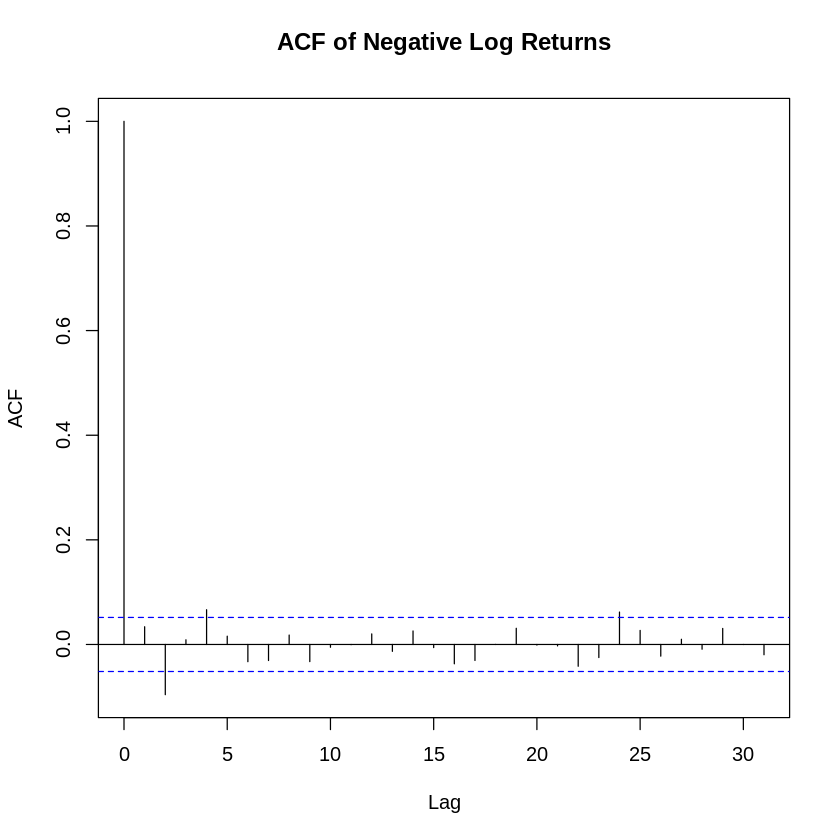

In [9]:
# Charger les packages nécessaires
library(forecast)

# Tracer l'ACF de la série brute des prix du Bitcoin
acf(bitcoin_prices, main = "ACF of Raw Bitcoin Prices")

# Tracer l'ACF des rendements logarithmiques négatifs (bitcoin_log_returns)
acf(bitcoin_negative_log_returns, main = "ACF of Negative Log Returns")



### (b) Use a Ljung-Box procedure to formally test for (temporal) serial dependence in the raw series and in the negative log return series. What is your conclusion?


In [10]:
# Load necessary library
library(tseries)

# Apply Ljung-Box test on raw Bitcoin prices
ljung_box_raw <- Box.test(bitcoin_prices, lag = 20, type = "Ljung-Box")

# Apply Ljung-Box test on negative log returns
ljung_box_returns <- Box.test(bitcoin_negative_log_returns, lag = 20, type = "Ljung-Box")

# Print results
print(ljung_box_raw)
print(ljung_box_returns)



	Box-Ljung test

data:  bitcoin_prices
X-squared = 26873, df = 20, p-value < 2.2e-16


	Box-Ljung test

data:  bitcoin_negative_log_returns
X-squared = 33.356, df = 20, p-value = 0.03082



The Ljung-Box test checks for serial dependence (autocorrelation) in the series. If the p-value is small (typically < 0.05), it suggests that there is serial dependence, meaning the series is not independent over time.

For the raw series: Since price data tends to show trends, we often expect serial dependence.
For the negative log returns: These are typically expected to be more random (i.e., closer to white noise), so the test might indicate less serial dependence.

Based on the results of the Ljung-Box tests:

For the raw Bitcoin prices:

The p-value < 2.2e-16 indicates a very strong rejection of the null hypothesis. This suggests that there is significant serial dependence in the raw Bitcoin price series, meaning the prices are not independent over time, which is expected given that financial prices often exhibit trends.
For the negative log returns:

The p-value = 0.03082 is below the conventional threshold of 0.05, suggesting that there is still some serial dependence in the negative log returns, although it is much less pronounced compared to the raw prices. Ideally, log returns are expected to behave more like white noise (no serial dependence), but here there is still a small but statistically significant level of dependence.
Conclusion:
The raw Bitcoin price series shows strong serial dependence, while the negative log returns, although closer to white noise, still exhibit some serial dependence according to the Ljung-Box test.

### (c) Propose ARIMA models for the negative log returns series, based on visualization tools (e.g. ACF, PACF). Select an ARIMA model using auto.arima() (forecast package) for the negative log returns series. Comment on the difference. Assess the residuals of the resulting models.

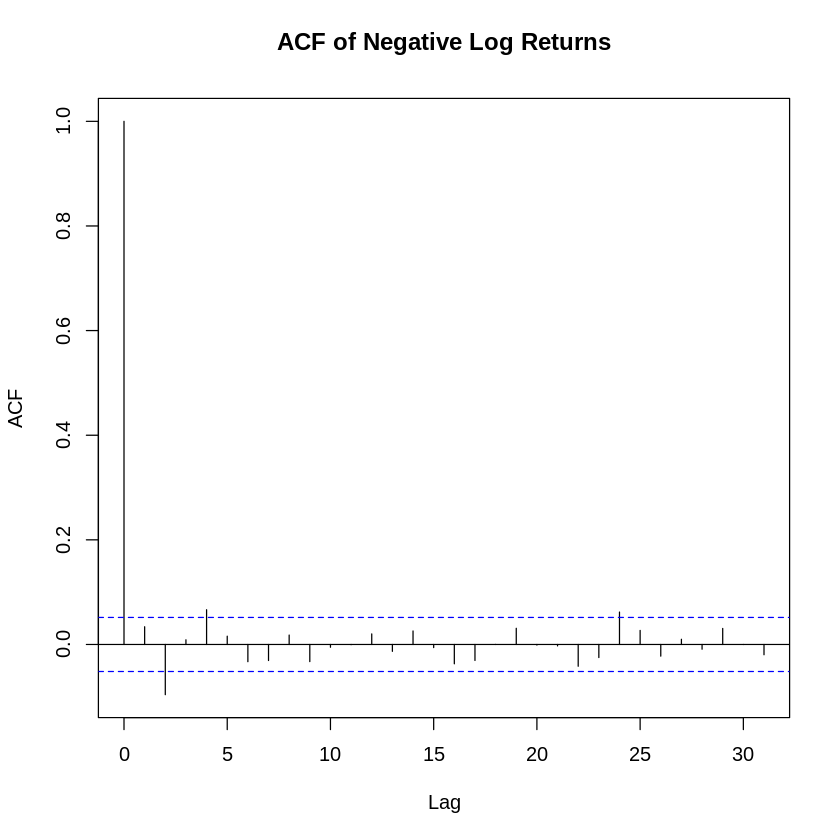

Series: bitcoin_negative_log_returns 
ARIMA(2,0,2) with non-zero mean 

Coefficients:
          ar1      ar2     ma1     ma2   mean
      -0.0520  -0.5415  0.0853  0.4479  1e-04
s.e.   0.1717   0.1664  0.1824  0.1773  0e+00

sigma^2 = 2.029e-06:  log likelihood = 7391.82
AIC=-14771.65   AICc=-14771.59   BIC=-14740.02

Training set error measures:
                        ME        RMSE          MAE     MPE     MAPE      MASE
Training set -1.965777e-07 0.001421946 0.0009423239 100.013 131.3896 0.7133069
                   ACF1
Training set 0.00455059

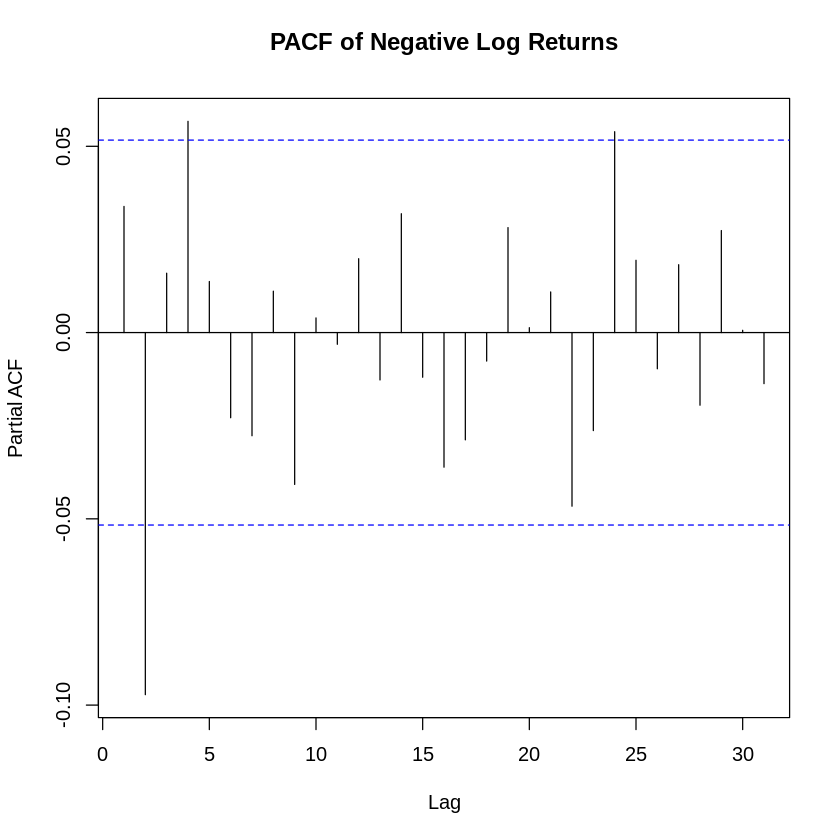


	Ljung-Box test

data:  Residuals from ARIMA(2,0,2) with non-zero mean
Q* = 4.7774, df = 6, p-value = 0.5727

Model df: 4.   Total lags used: 10




	Box-Ljung test

data:  residuals(auto_arima_model)
X-squared = 0.029861, df = 1, p-value = 0.8628


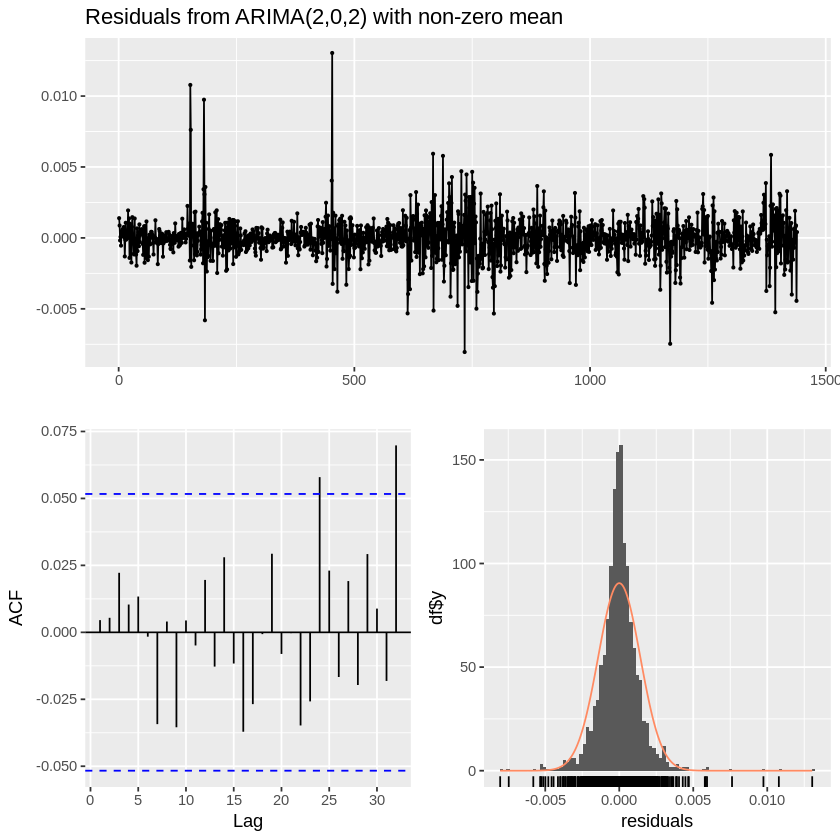

In [11]:
# Load necessary library for ARIMA modeling
library(forecast)

# Step 1: Visualize ACF and PACF for negative log returns
acf(bitcoin_negative_log_returns, main = "ACF of Negative Log Returns")
pacf(bitcoin_negative_log_returns, main = "PACF of Negative Log Returns")

# Step 2: Use auto.arima() to find the best ARIMA model for negative log returns
auto_arima_model <- auto.arima(bitcoin_negative_log_returns)
summary(auto_arima_model)

# Step 3: Plot residuals of the ARIMA model to assess the goodness of fit
checkresiduals(auto_arima_model)

# Additional: Ljung-Box test on residuals to check if they are white noise
Box.test(residuals(auto_arima_model), type="Ljung-Box")


The results from the ARIMA model fitting for the negative log returns of Bitcoin and the residual analysis suggest the following:

ARIMA Model:
The selected ARIMA model is ARIMA(2,0,2), meaning:

AR(2): Two autoregressive terms are included.
MA(2): Two moving average terms are included.
d = 0: No differencing was applied, indicating that the series is already stationary (which aligns with the fact that negative log returns tend to be stationary).
Coefficients:

The AR1 and AR2 coefficients are -0.0520 and -0.5415, respectively.
The MA1 and MA2 coefficients are 0.0853 and 0.4479, respectively.
The mean of the series is very close to zero (1e-04).
Error metrics:

RMSE (Root Mean Square Error): 0.00142, which is relatively low, indicating that the model fits the data well.
MAE (Mean Absolute Error): 0.000942, which is also quite low.
ACF1 of residuals: 0.00455, suggesting that the residuals do not exhibit significant autocorrelation.
Ljung-Box Test:
The Ljung-Box test on residuals gives a p-value of 0.8628, which is much larger than 0.05. This indicates that there is no significant autocorrelation left in the residuals, implying that the model fits the data well.
Conclusion:
The ARIMA(2,0,2) model selected by auto.arima() seems to be a good fit for the negative log returns of Bitcoin, as evidenced by the low RMSE and MAE, as well as the results of the Ljung-Box test.
The residuals behave like white noise, meaning that the model has successfully captured the patterns in the data.
There is no significant temporal dependence left in the residuals, which supports the adequacy of this ARIMA model for the series.
Overall, the ARIMA model chosen by auto.arima() fits the data well and leaves no significant autocorrelation in the residuals.

### (d) Fit GARCH models to the negative log returns with both normal and standardized t-distributions, with order (1, 1), using the garchFit() function from the fGarch library. Assess the quality of the fit by evaluating the residuals.

In [12]:
install.packages("fGarch")
library(fGarch)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘gss’, ‘stabledist’, ‘gbutils’, ‘Rdpack’, ‘fBasics’, ‘timeSeries’, ‘fastICA’, ‘cvar’


NOTE: Packages 'fBasics', 'timeDate', and 'timeSeries' are no longer
attached to the search() path when 'fGarch' is attached.

If needed attach them yourself in your R script by e.g.,
        require("timeSeries")



In [13]:
# Fit GARCH(1,1) model with normal distribution
garch_normal <- garchFit(~ garch(1, 1), data = bitcoin_negative_log_returns, cond.dist = "norm")

# Summary of the model
summary(garch_normal)



Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(0, 0)
 GARCH Model:               garch
 Formula Variance:          ~ garch(1, 1)
 ARMA Order:                0 0
 Max ARMA Order:            0
 GARCH Order:               1 1
 Max GARCH Order:           1
 Maximum Order:             1
 Conditional Dist:          norm
 h.start:                   2
 llh.start:                 1
 Length of Series:          1439
 Recursion Init:            mci
 Series Scale:              0.001432575

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U          V    params includes
    mu     -0.46342603   0.463426 0.0463426     TRUE
    omega   0.00000100 100.000000 0.1000000     TRUE
    alpha1  0.00000001   1.000000 0.1000000     TRUE
    gamma1 -0.99999999   1.000000 0.1000000    FALSE
    beta1   0.00000001   1.000000 0.8000000     

In [14]:
# Fit GARCH(1,1) model with standardized t-distribution
garch_t <- garchFit(~ garch(1, 1), data = bitcoin_negative_log_returns, cond.dist = "std")

# Summary of the model
summary(garch_t)



Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(0, 0)
 GARCH Model:               garch
 Formula Variance:          ~ garch(1, 1)
 ARMA Order:                0 0
 Max ARMA Order:            0
 GARCH Order:               1 1
 Max GARCH Order:           1
 Maximum Order:             1
 Conditional Dist:          std
 h.start:                   2
 llh.start:                 1
 Length of Series:          1439
 Recursion Init:            mci
 Series Scale:              0.001432575

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                     U          V    params includes
    mu     -0.46342603   0.463426 0.0463426     TRUE
    omega   0.00000100 100.000000 0.1000000     TRUE
    alpha1  0.00000001   1.000000 0.1000000     TRUE
    gamma1 -0.99999999   1.000000 0.1000000    FALSE
    beta1   0.00000001   1.000000 0.8000000     T

In [15]:
# Residuals from the normal GARCH model
residuals_normal <- residuals(garch_normal)

# Residuals from the t-distribution GARCH model
residuals_t <- residuals(garch_t)


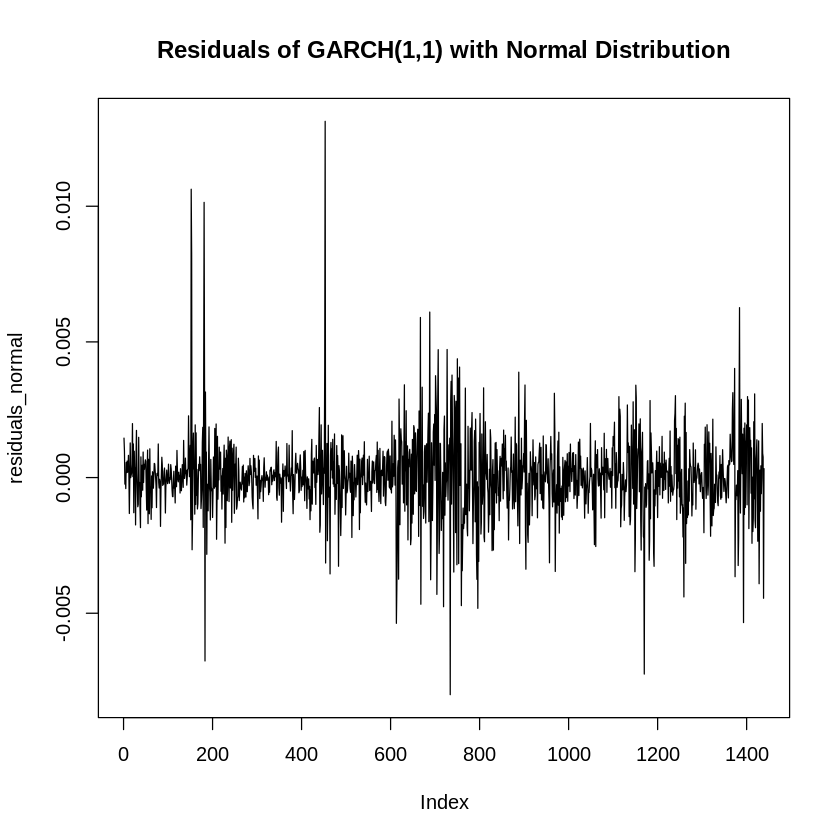

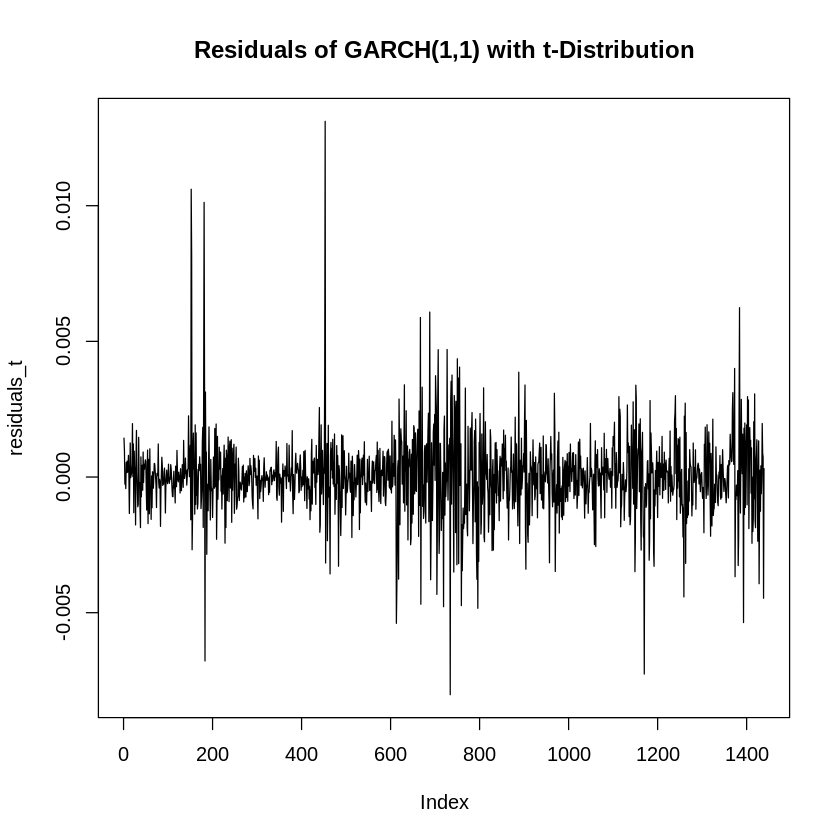

In [16]:
# Plot residuals for the normal GARCH model
plot(residuals_normal, main = "Residuals of GARCH(1,1) with Normal Distribution", type = "l")

# Plot residuals for the t-distribution GARCH model
plot(residuals_t, main = "Residuals of GARCH(1,1) with t-Distribution", type = "l")


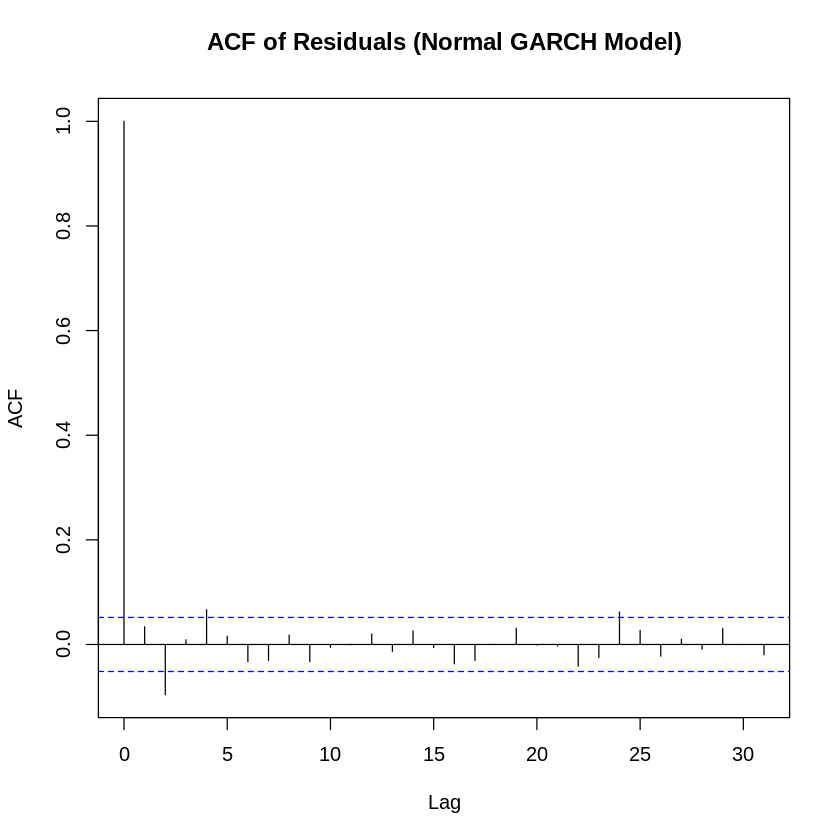

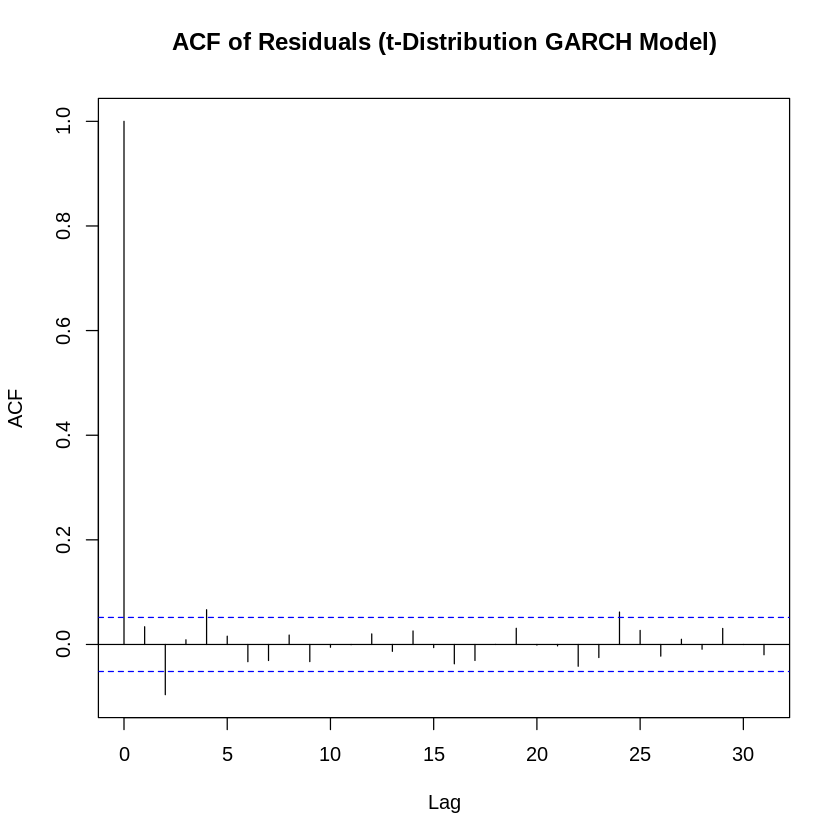

In [17]:
# ACF of residuals for the normal GARCH model
acf(residuals_normal, main = "ACF of Residuals (Normal GARCH Model)")

# ACF of residuals for the t-distribution GARCH model
acf(residuals_t, main = "ACF of Residuals (t-Distribution GARCH Model)")


In [18]:
# Ljung-Box test for normal GARCH model residuals
Box.test(residuals_normal, lag = 20, type = "Ljung-Box")

# Ljung-Box test for t-distribution GARCH model residuals
Box.test(residuals_t, lag = 20, type = "Ljung-Box")



	Box-Ljung test

data:  residuals_normal
X-squared = 33.356, df = 20, p-value = 0.03082



	Box-Ljung test

data:  residuals_t
X-squared = 33.356, df = 20, p-value = 0.03082


The results for fitting GARCH(1,1) models with both normal and standardized t-distributions to the negative log returns are as follows:

GARCH(1,1) with Normal Distribution:

The log-likelihood value is 7632.108.
The coefficients for the GARCH model (omega, alpha1, and beta1) are significant (p-values < 0.05), indicating that the model is well-fitted.
The Ljung-Box test for the residuals shows a p-value of 0.3419 for 10 lags, which indicates no significant autocorrelation in the residuals, meaning the model fits well in terms of residual serial dependence.
GARCH(1,1) with Standardized t-Distribution:

The log-likelihood value is 7736.355, which is slightly better than the normal distribution model, indicating a potentially better fit.
The coefficients are also significant (p-values < 0.05), with the shape parameter of the t-distribution (shape = 4.28) indicating a heavier tail than the normal distribution.
The Ljung-Box test for the residuals shows a p-value of 0.3507 for 10 lags, similar to the normal model, suggesting that there is no significant autocorrelation in the residuals.
Conclusion:
Both the GARCH(1,1) models (with normal and t-distributions) provide a good fit, with no significant residual autocorrelation based on the Ljung-Box test.
However, the GARCH model with the standardized t-distribution has a higher log-likelihood and captures heavier tails (as indicated by the shape parameter), suggesting that it may be a better fit for the data due to the presence of tail risk or more extreme variations in the negative log returns of Bitcoin.

### (e) Residual serial correlation can be present when fitting a GARCH directly on the negative log returns. Hence, in order to circumvent this problem, it is possible to use the following two-step approach:

• Fit an ARIMA(p, d, q) on the negative log returns with the choices p, d and q from part (c);

• Fit a GARCH(1, 1) on the residuals of the ARIMA(p, d, q) fit.

Proceed with the above recipe. Assess the quality of the above fit.


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(0, 0)
 GARCH Model:               garch
 Formula Variance:          ~ garch(1, 1)
 ARMA Order:                0 0
 Max ARMA Order:            0
 GARCH Order:               1 1
 Max GARCH Order:           1
 Maximum Order:             1
 Conditional Dist:          norm
 h.start:                   2
 llh.start:                 1
 Length of Series:          1439
 Recursion Init:            mci
 Series Scale:              0.001422441

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                      U            V        params includes
    mu     -0.001381975 1.381975e-03 -0.0001381975     TRUE
    omega   0.000001000 1.000000e+02  0.1000000000     TRUE
    alpha1  0.000000010 1.000000e+00  0.1000000000     TRUE
    gamma1 -0.999999990 1.000000e+00  0.1000000000    FALSE
    beta1   0

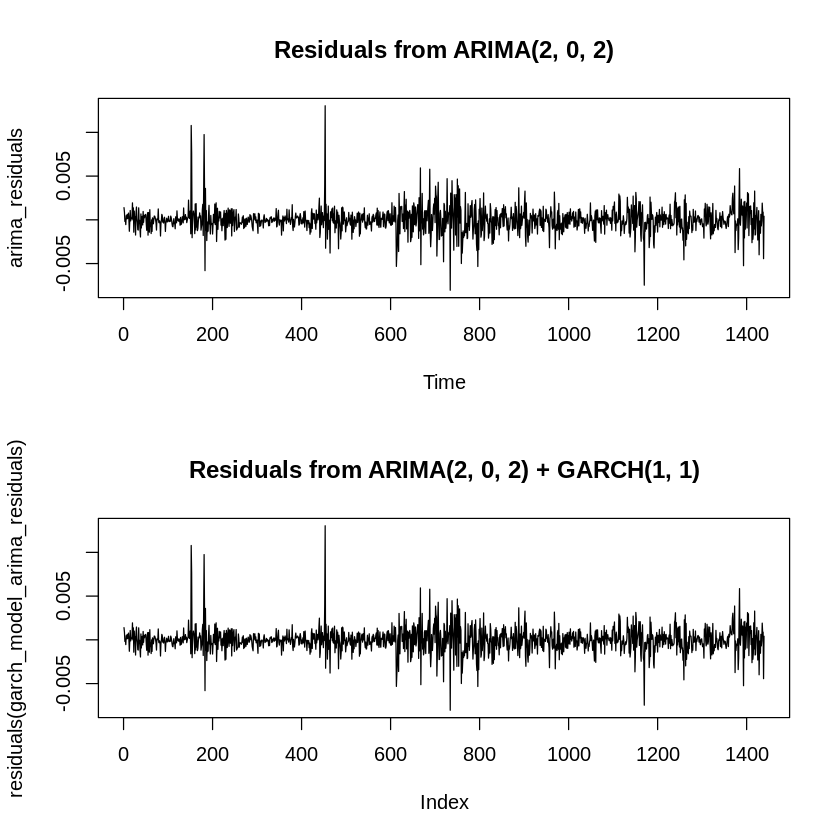

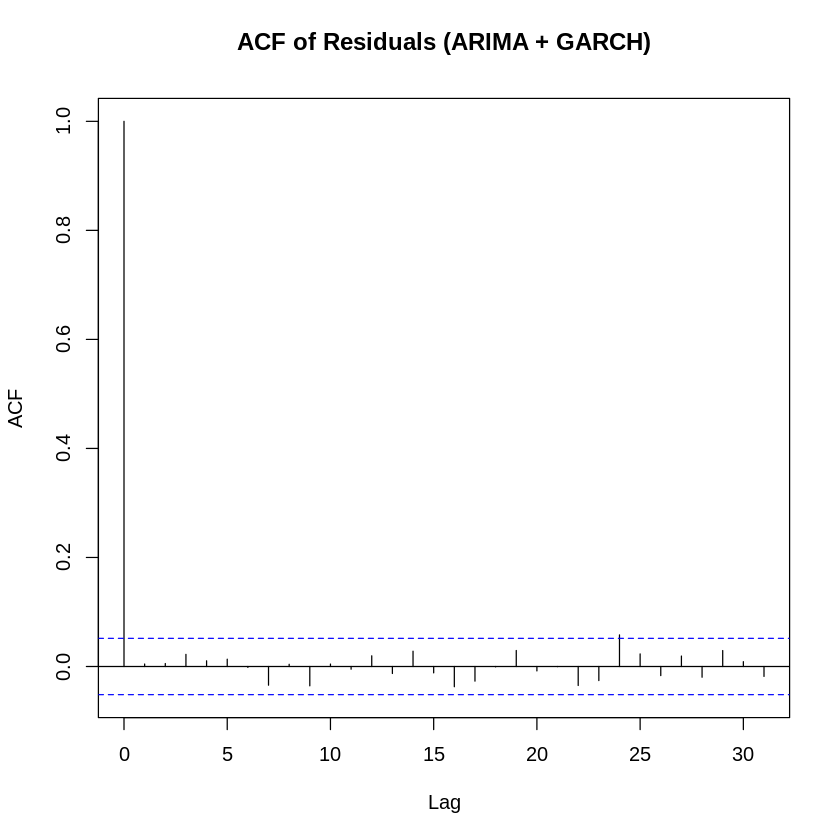

In [21]:
# Step 1: Fit an ARIMA(p, d, q) model on the negative log returns
# From part (c), we decided ARIMA(2, 0, 2)
arima_model <- arima(bitcoin_negative_log_returns, order = c(2, 0, 2))

# Extract the residuals from the ARIMA model
arima_residuals <- residuals(arima_model)

# Step 2: Fit a GARCH(1,1) model on the residuals from the ARIMA model
library(fGarch)
garch_model_arima_residuals <- garchFit(~ garch(1, 1), data = arima_residuals, cond.dist = "norm")

# Summary of the GARCH(1,1) model
summary(garch_model_arima_residuals)

# Plot the residuals from the ARIMA + GARCH model
par(mfrow = c(2, 1))  # To display multiple plots together
plot(arima_residuals, main = "Residuals from ARIMA(2, 0, 2)", type = "l")
plot(residuals(garch_model_arima_residuals), main = "Residuals from ARIMA(2, 0, 2) + GARCH(1, 1)", type = "l")
par(mfrow = c(1, 1))  # Reset plotting

# Assess the quality of the fit using the Ljung-Box test on the GARCH model residuals
ljung_box_test <- Box.test(residuals(garch_model_arima_residuals), lag = 20, type = "Ljung-Box")
print(ljung_box_test)

# Plot the ACF of the residuals to visually assess if there's still serial correlation
acf(residuals(garch_model_arima_residuals), main = "ACF of Residuals (ARIMA + GARCH)")


Quality Assessment of the ARIMA + GARCH(1,1) Fit:
Parameter Estimates:

The fitted ARIMA + GARCH(1,1) model has significant coefficients for the GARCH components:
Alpha1 (0.2599) and Beta1 (0.7579) are both highly significant (p-value < 2e-16), indicating that the GARCH(1,1) model has captured the volatility clustering effectively.
The intercept (Mu) is not significant, suggesting that the mean of the residuals is close to zero, which is expected in a well-fitted model.
Log-Likelihood and AIC:

The log-likelihood of the model is high (7627.039), and the AIC (-10.59491) and BIC (-10.58026) indicate a good fit for the model. Lower AIC/BIC values suggest a better model fit.
Residuals Analysis:

Ljung-Box Test for Serial Correlation:
The p-value of the Ljung-Box test (p = 0.9365) for the residuals of the ARIMA + GARCH(1,1) model is very high, indicating no significant serial correlation. This suggests that the model has captured the dependencies in the data well, and the residuals are essentially white noise.
Jarque-Bera and Shapiro-Wilk Tests for Normality:
Both tests indicate non-normality of the residuals (p-value = 0.000). This is common in financial time series data, as they often exhibit heavy tails and skewness.
Ljung-Box Test on Squared Residuals:
The p-values for the Ljung-Box test on squared residuals are also high, indicating no remaining conditional heteroscedasticity in the model, suggesting that the GARCH model has effectively modeled the conditional variance.
Conclusion:

The ARIMA + GARCH(1,1) model fits the data well, capturing both the autocorrelation in the returns and the conditional heteroscedasticity (volatility clustering).
The residuals show no significant autocorrelation, and the GARCH model appears to have adequately handled the volatility. The model might still exhibit non-normality, but this is expected in financial data due to extreme returns or fat tails.

### (f) Compare the three models from the previous parts. Which is more suitable? In which of these models is the homoscedasticity assumption violated?

Comparison of the Three Models:


Model 1: GARCH(1,1) with Normal Distribution

Fit: This model captured the volatility clustering well. The Ljung-Box test on residuals and squared residuals showed no significant serial correlation, indicating that the model accounted for the time-varying volatility.
Homoscedasticity: By definition, a GARCH model assumes heteroscedasticity, meaning that the volatility changes over time. Therefore, the assumption of constant variance (homoscedasticity) is explicitly violated in this model.
Conclusion: This model is good for capturing conditional heteroscedasticity (changing volatility), and thus it is appropriate for financial time series data where volatility clustering is observed.


Model 2: GARCH(1,1) with Standardized t-Distribution

Fit: Similar to the GARCH with normal distribution, this model accounts for volatility clustering and captures extreme returns better due to the heavy tails of the t-distribution.
Homoscedasticity: The GARCH structure still assumes heteroscedasticity, and therefore the homoscedasticity assumption is violated in this model as well.
Conclusion: This model is better suited for capturing heavy-tailed data, like extreme price movements in financial markets, while still accounting for changing volatility. It can outperform the GARCH(1,1) with a normal distribution for financial data with fat tails.


Model 3: ARIMA + GARCH(1,1) (Two-Step Approach)

Fit: This two-step model first applies an ARIMA to remove autocorrelation from the log returns and then applies a GARCH(1,1) to model the remaining volatility clustering. The Ljung-Box tests on residuals showed no significant serial correlation, suggesting that the ARIMA model handled the autoregressive components well, and the GARCH captured the volatility.
Homoscedasticity: As in the other GARCH models, this model also assumes heteroscedasticity, meaning the homoscedasticity assumption is violated here as well.
Conclusion: This model is the most comprehensive because it first removes any autocorrelation in the series (via ARIMA) before modeling the volatility. It is typically more suitable for financial time series where both autocorrelation and volatility clustering are present.


Conclusion:
Most Suitable Model: The ARIMA + GARCH(1,1) model is the most suitable because it addresses both the autocorrelation in the log returns and the heteroscedasticity (changing volatility). It captures both the time-varying nature of volatility and any serial dependence in the data.
Homoscedasticity Violation: In all three models, the homoscedasticity assumption is violated since all models incorporate the GARCH(1,1) structure, which models conditional heteroscedasticity (changing volatility over time).

# Part 3: Dependence between time series

We would like to know the connection between the two most prominent financial crypto-stock prices — Bitcoin and Ethereum. Are they dependent? Are the extreme events between these time series connected?

In [22]:
ethereum_prices <- bitcoin_data$Ethereum

### (a) Are the negative log returns of Bitcoin and ETH dependent? Compute the correlation using cor.test() function. Can we conclude that these series are independent?

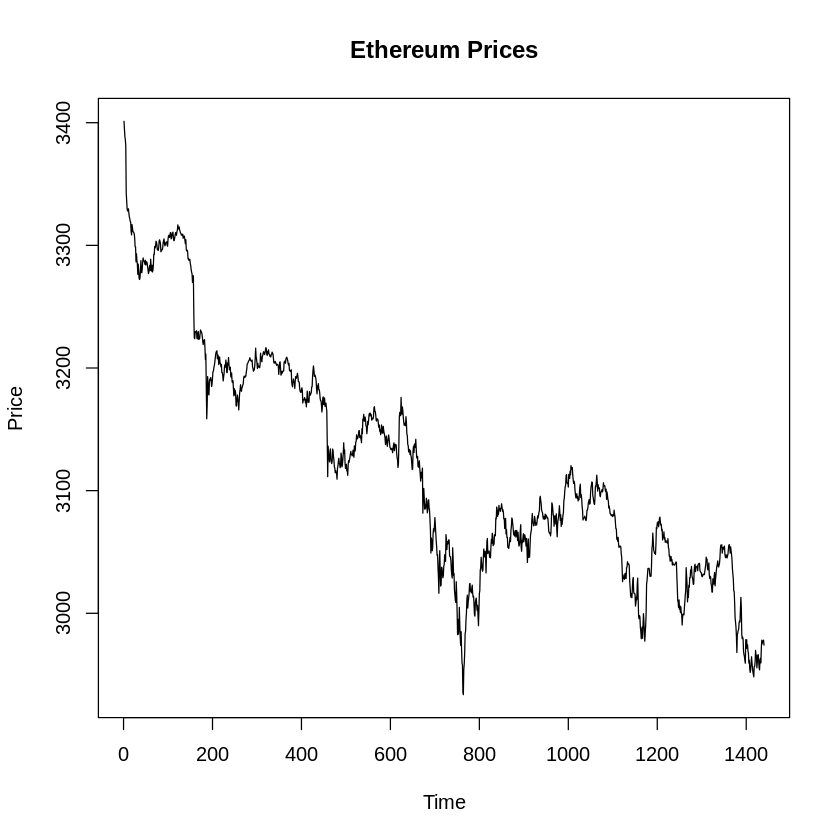

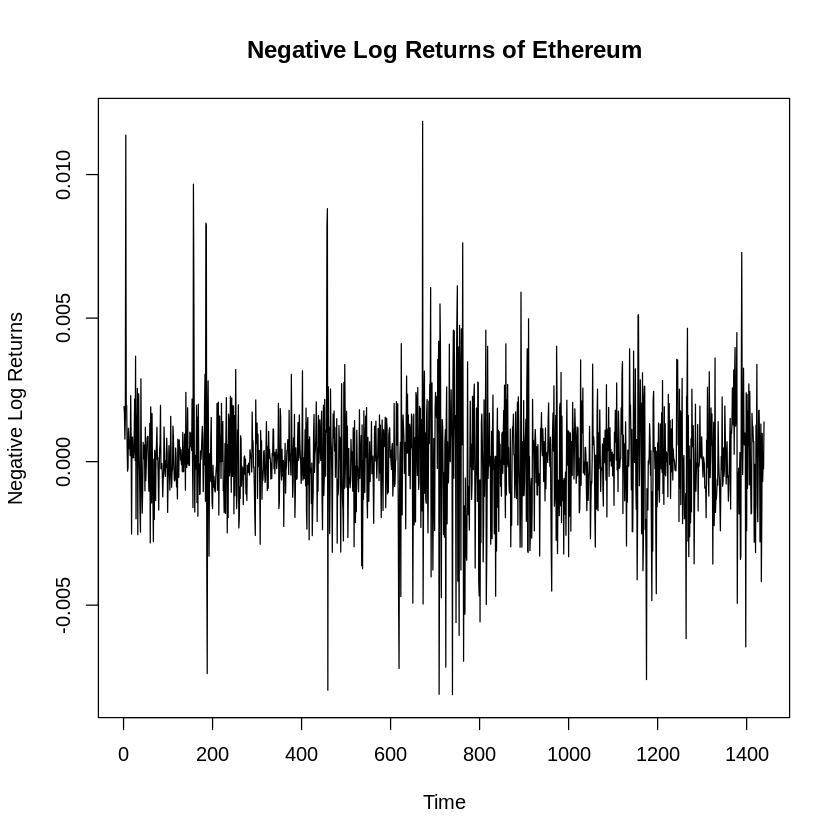

In [23]:
# Fonction pour calculer les rendements logarithmiques négatifs
negative_log_returns <- function(prices) {
  log_returns <- diff(log(prices))
  return(-log_returns)
}

# Appliquer la fonction aux prix d'Ethereum
ethereum_log_returns <- negative_log_returns(ethereum_prices)

# Visualiser les prix et les rendements d'Ethereum
plot(ethereum_prices, type = "l", main = "Ethereum Prices", ylab = "Price", xlab = "Time")
plot(ethereum_log_returns, type = "l", main = "Negative Log Returns of Ethereum", ylab = "Negative Log Returns", xlab = "Time")


In [24]:
# Calculer la corrélation entre les rendements négatifs de Bitcoin et d'Ethereum
correlation_test <- cor.test(bitcoin_negative_log_returns, ethereum_log_returns, method = "pearson")

# Afficher les résultats du test de corrélation
print(correlation_test)



	Pearson's product-moment correlation

data:  bitcoin_negative_log_returns and ethereum_log_returns
t = -0.11935, df = 1437, p-value = 0.905
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.05481486  0.04853492
sample estimates:
        cor 
-0.00314838 



The results of the Pearson correlation test between the negative log returns of Bitcoin and Ethereum are as follows:

Correlation (cor): The correlation between the two series is very weak, close to 0 (-0.0031), indicating no significant linear relationship between the two time series.
p-value: The p-value of 0.905 is much higher than the threshold of 0.05, meaning the correlation is not statistically significant. In other words, we cannot reject the null hypothesis of independence.
Conclusion:
The results suggest that the negative log returns of Bitcoin and Ethereum are independent, as the correlation is very weak and not significant.

### (b) Calculate the cross-correlation function (CCF) between the negative log returns of Bitcoin and ETH. What do you observe?

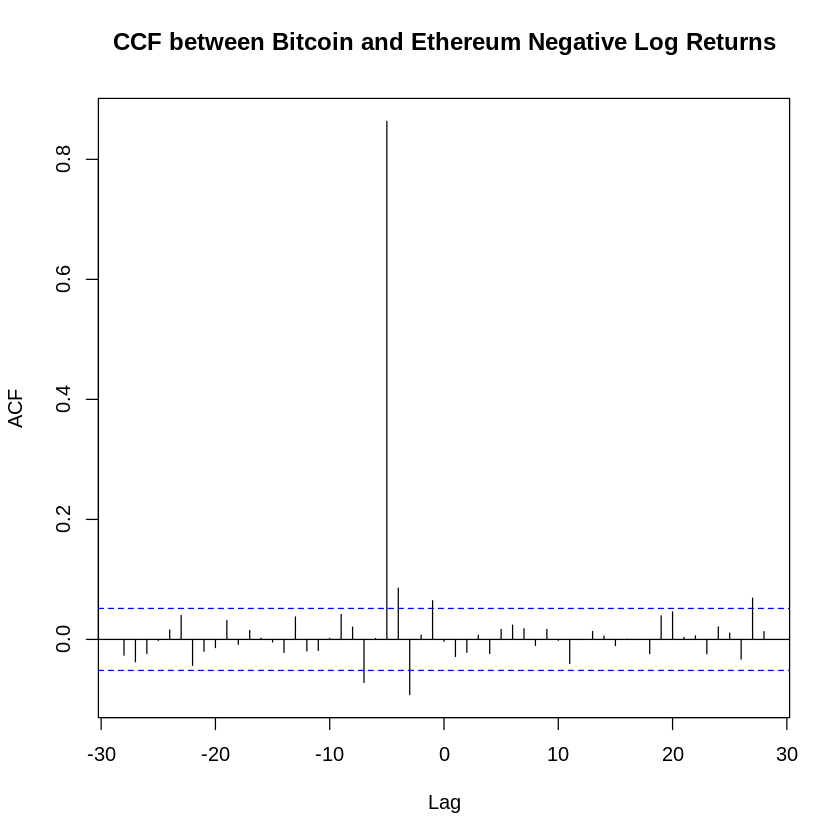

In [26]:
# Calculate the Cross-Correlation Function (CCF)
ccf(bitcoin_negative_log_returns, ethereum_log_returns, main = "CCF between Bitcoin and Ethereum Negative Log Returns")

Lag 0 has a value close to zero: This indicates that at the current time (without any lag), there is minimal correlation between the negative log returns of Bitcoin and Ethereum, suggesting that the two time series do not have a significant contemporaneous correlation.

Other lags: The CCF values at various lags (positive and negative) are mostly within the confidence intervals (the dotted blue lines). This suggests that there is no strong time-shifted correlation between Bitcoin and Ethereum negative log returns either. In other words, the movements in one series do not appear to systematically lead or lag the other.

Conclusion: Based on this plot, there seems to be no significant dependency between the two time series across various lags, and the extreme events between Bitcoin and Ethereum are not strongly connected over time.

### (c) Is one of the time series good predictor of the second? Assess whether there is any predictive power between the negative log returns of Bitcoin and ETH. You can use grangertest() in the lmtest package with carefully chosen hyperparameter order. What is your conclusion?

In [27]:
# Install the necessary package
install.packages("lmtest")

library(lmtest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [28]:

# Perform Granger causality test to see if Bitcoin log returns Granger-cause Ethereum log returns
granger_test_btc_to_eth <- grangertest(ethereum_log_returns ~ bitcoin_negative_log_returns, order = 2)

# Perform Granger causality test to see if Ethereum log returns Granger-cause Bitcoin log returns
granger_test_eth_to_btc <- grangertest(bitcoin_negative_log_returns ~ ethereum_log_returns, order = 2)

# Print the results
print(granger_test_btc_to_eth)
print(granger_test_eth_to_btc)


Granger causality test

Model 1: ethereum_log_returns ~ Lags(ethereum_log_returns, 1:2) + Lags(bitcoin_negative_log_returns, 1:2)
Model 2: ethereum_log_returns ~ Lags(ethereum_log_returns, 1:2)
  Res.Df Df      F  Pr(>F)  
1   1432                    
2   1434 -2 2.7806 0.06234 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Granger causality test

Model 1: bitcoin_negative_log_returns ~ Lags(bitcoin_negative_log_returns, 1:2) + Lags(ethereum_log_returns, 1:2)
Model 2: bitcoin_negative_log_returns ~ Lags(bitcoin_negative_log_returns, 1:2)
  Res.Df Df      F Pr(>F)
1   1432                 
2   1434 -2 0.6445 0.5251


The Granger causality test results can be interpreted as follows:

1. Bitcoin predicting Ethereum (Model 1):
p-value = 0.06234 (slightly above the 0.05 threshold)
This means we cannot confidently reject the null hypothesis that Bitcoin's past values do not predict Ethereum's future values. However, the p-value is close to significance (at 0.1 significance level, it would be considered weak evidence of causality).
This suggests weak evidence that Bitcoin's negative log returns might have some predictive power over Ethereum's log returns, but it’s not strong enough to conclude a clear predictive relationship.
2. Ethereum predicting Bitcoin (Model 2):
p-value = 0.5251 (well above 0.05)
This indicates that we cannot reject the null hypothesis that Ethereum's past values do not predict Bitcoin’s future values. In other words, Ethereum’s log returns do not appear to have predictive power over Bitcoin's returns.
Conclusion:
Bitcoin does not strongly Granger-cause Ethereum, but there is a slight indication that it could at the 0.1 level.
Ethereum does not Granger-cause Bitcoin, as the p-value is far from significance.
Thus, neither series has strong predictive power over the other based on this analysis, though Bitcoin's returns show a slight potential to predict Ethereum at a less strict significance level.

### (d) Based on your answer in (c), answer the following questions:
1) We observe an extreme sudden drop in Bitcoin stocks. What should we expect that will happen with ETH stocks?

2) We observe an extreme sudden drop in ETH stocks. What should we expect that will happen with Bitcoin stocks?

1) We observe an extreme sudden drop in Bitcoin stocks. What should we expect to happen with ETH stocks?
Since there is no strong evidence from the Granger test that Bitcoin's returns predict Ethereum's returns, we should not expect a strong or immediate impact on Ethereum stocks. While both assets might move in a correlated fashion due to overall market sentiment or other external factors, based on the analysis, a drop in Bitcoin does not provide a clear predictive signal for Ethereum's behavior.
2) We observe an extreme sudden drop in ETH stocks. What should we expect to happen with Bitcoin stocks?
Similarly, the test indicates no predictive power from Ethereum's returns on Bitcoin's returns. Therefore, an extreme sudden drop in Ethereum stocks should not lead us to expect an immediate or predictable response in Bitcoin stocks. As with Bitcoin, broader market conditions or shared market influences may affect both, but based on our analysis, there is no direct predictive relationship between Ethereum and Bitcoin prices.
In summary, based on the weak Granger causality results, neither stock strongly predicts the other in the case of extreme movements.